<a href="https://colab.research.google.com/github/Hushpuppyzac/DLI-Assignment/blob/main/DLI_Grp_Asgmt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import requests
import nbformat
from IPython import get_ipython
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler

def run_notebook_from_github(url):
    print("🔄 Downloading notebook from GitHub...")
    try:
        response = requests.get(url)
        response.raise_for_status()
    except Exception as e:
        print(f"❌ Failed to download notebook: {e}")
        return None

    print("📖 Parsing notebook content...")
    try:
        notebook = nbformat.reads(response.text, as_version=4)
    except Exception as e:
        print(f"❌ Failed to parse notebook: {e}")
        return None

    ipython = get_ipython()
    if ipython is None:
        print("❌ This function must be run in a Jupyter environment.")
        return None

    print("⚙️ Running notebook cells...\n")
    # Execute code from the downloaded notebook directly in the current scope
    for i, cell in enumerate(notebook.cells):
        if cell.cell_type == 'code':
            try:
                print(f"▶️ Executing cell [{i + 1}]...")
                # Use exec to execute the code in the current global scope
                exec(cell.source, globals())
            except Exception as e:
                print(f"❌ Error in cell [{i + 1}]: {e}")
                # Continue execution even if a cell fails, to see all errors

    print("\n✅ All executable cells have been processed.")
    # Return the variables needed for the next steps
    return X_train_scaled, X_test_scaled, y_train_balanced, y_test

notebook_url = "https://raw.githubusercontent.com/Hushpuppyzac/DLI-Assignment/main/CleanedData.ipynb"
# Assign the returned variables to the global scope
notebook_results = run_notebook_from_github(notebook_url)

if notebook_results is not None:
    X_train_scaled, X_test_scaled, y_train_balanced, y_test = notebook_results
    # Ensure the target variables are integers after running the notebook code
    if isinstance(y_train_balanced, pd.Series):
        y_train_balanced = y_train_balanced.astype(int)
    if isinstance(y_test, pd.Series):
        y_test = y_test.astype(int)

🔄 Downloading notebook from GitHub...
📖 Parsing notebook content...
⚙️ Running notebook cells...

▶️ Executing cell [2]...

             INITIAL DATASET INFORMATION             
Total rows before any cleaning: 225,745
Initial Label distribution (raw data):


,count
Label,
DDoS,128027
BENIGN,97718



--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             225745 non-null  int64  
 1    Flow Duration                225745 non-null  int64  
 2    Total Fwd Packets            225745 non-null  int64  
 3    Total Backward Packets       225745 non-null  int64  
 4   Total Length of Fwd Packets   225745 non-null  int64  
 5    Total Length of Bwd Packets  225745 non-null  int64  
 6    Fwd Packet Length Max        225745 non-null  int64  
 7    Fwd Packet Length Min        225745 non-null  int64  
 8    Fwd Packet Length Mean       225745 non-null  float64
 9    Fwd Packet Length Std        225745 non-null  float64
 10  Bwd Packet Length Max         225745 non-null  int64  
 11   Bwd Packet Length Min        225745 non-null  int64  
 12   Bwd Packet Length M

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,225745.00000,2.257450e+05,225745.000000,225745.000000,225745.000000,2.257450e+05,225745.000000,225745.000000,225745.000000,225745.000000,...,225745.000000,225745.000000,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05
mean,8879.61946,1.624165e+07,4.874916,4.572775,939.463346,5.960477e+03,538.535693,27.882221,164.826715,214.907242,...,3.311497,21.482753,1.848261e+05,1.293436e+04,2.080849e+05,1.776201e+05,1.032214e+07,3.611943e+06,1.287813e+07,7.755355e+06
std,19754.64740,3.152437e+07,15.422874,21.755356,3249.403484,3.921834e+04,1864.128991,163.324159,504.892965,797.411073,...,12.270018,4.166799,7.979250e+05,2.102737e+05,9.002350e+05,7.842602e+05,2.185303e+07,1.275689e+07,2.692126e+07,1.983109e+07
min,0.00000,-1.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,80.00000,7.118000e+04,2.000000,1.000000,26.000000,0.000000e+00,6.000000,0.000000,6.000000,0.000000,...,1.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.00000,1.452333e+06,3.000000,4.000000,30.000000,1.640000e+02,20.000000,0.000000,8.666667,5.301991,...,2.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,80.00000,8.805237e+06,5.000000,5.000000,63.000000,1.160100e+04,34.000000,6.000000,32.000000,10.263203,...,4.000000,20.000000,1.878000e+03,0.000000e+00,1.878000e+03,1.862000e+03,8.239725e+06,0.000000e+00,8.253838e+06,7.422849e+06
max,65532.00000,1.199999e+08,1932.000000,2942.000000,183012.000000,5.172346e+06,11680.000000,1472.000000,3867.000000,6692.644993,...,1931.000000,52.000000,1.000000e+08,3.950000e+07,1.000000e+08,1.000000e+08,1.200000e+08,6.530000e+07,1.200000e+08,1.200000e+08




--- DataFrame Columns after stripping whitespace and renaming ---
['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', '

,count
Label,
1,128014
0,95068



First 5 rows of cleaned DataFrame:


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0




             AFTER INITIAL TRAIN-TEST SPLIT             
Training data shape (X_train): (178465, 68)
Testing data shape (X_test):   (44617, 68)
Training label shape (y_train): (178465,)
Testing label shape (y_test):   (44617,)

Training label distribution:


,count
Label,
1,102411
0,76054



Testing label distribution:


,count
Label,
1,25603
0,19014




--- Class Distribution Before Balancing (Training Set) ---


,count
Label,
1,102411
0,76054



         AFTER UNDERSAMPLING (Training Set Only)         
Total rows in balanced training set: 152,108
Class balance (Training Set):


,count
Label,
0,76054
1,76054




        SAMPLE OF BALANCED TRAINING DATAFRAME        
Total Rows       : 152,108
DDoS Attacks     : 76,054
Benign Records   : 76,054

Balanced Training DataFrame (First 5 Rows):


,Destination Port,Flow Duration,Label
0,53,108497,0
1,61761,48116,0
2,59618,65,0
3,55903,9318481,0
4,80,9402695,1



DDoS Samples (Balanced Training Set - First 5):


,Destination Port,Flow Duration,Label
4,80,9402695,1
6,80,7373820,1
8,80,2857734,1
9,80,10943778,1
13,80,1784554,1



Benign Samples (Balanced Training Set - First 5):


,Destination Port,Flow Duration,Label
0,53,108497,0
1,61761,48116,0
2,59618,65,0
3,55903,9318481,0
5,80,5860218,0




        AFTER FEATURE EXTRACTION (TRAIN & TEST)        

Sample Extracted Features (Training Set - First 5):


,pkt_length_diff,pkt_length_var_ratio,byte_ratio,duration_per_packet,avg_to_max_ratio
0,62,1.611,0.431,54248.229,0.931
1,11595,7.974,446.423,6873.704,0.143
2,0,0.000,0.000,32.500,0.000
3,0,1.000,0.200,1553077.578,1.167
4,0,1.000,3000000.000,1880535.239,1.200



Final Columns (Training Set after Feature Extraction):
['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'ECE Flag Count', 'Down/Up R

,pkt_length_diff,pkt_length_var_ratio,byte_ratio,duration_per_packet,avg_to_max_ratio
139654,0,1.000,0.200,819400.634,1.167
127815,5840,4.521,0.002,93517.633,0.249
111648,0,1.000,0.167,130544.814,1.143
76785,5840,4.521,0.002,7943.865,0.249
72328,0,1.000,3000000.000,61111.478,1.200



Final Columns (Testing Set after Feature Extraction):
['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'ECE Flag Count', 'Down/Up Ra

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,pkt_length_diff,pkt_length_var_ratio,byte_ratio,duration_per_packet,avg_to_max_ratio
0,-0.496462,-0.511479,-0.245222,-0.168530,-0.303820,-0.138477,-0.292419,0.082431,-0.269685,-0.294430,...,-0.220676,-0.469879,-0.279191,-0.475267,-0.390354,-0.788134,-0.663447,-0.042185,-0.558311,0.632065
1,2.424285,-0.513378,0.004044,-0.123929,3.008621,-0.140547,5.431752,-0.182254,3.902286,5.708969,...,-0.220676,-0.469879,-0.279191,-0.475267,-0.390354,2.285842,1.203662,-0.042170,-0.578708,-0.982426
2,2.322853,-0.514890,-0.245222,-0.168530,-0.317288,-0.141196,-0.315716,-0.182254,-0.355898,-0.294430,...,-0.220676,-0.469879,-0.279191,-0.475267,-0.390354,-0.804659,-1.136167,-0.042185,-0.581654,-1.275411
3,2.147016,-0.221781,-0.245222,0.009873,-0.315569,-0.140448,-0.312742,-0.148465,-0.344892,-0.294430,...,-0.204030,-0.041240,-0.279191,-0.126852,0.081679,-0.804659,-0.842734,-0.042185,0.087018,1.115593
4,-0.495185,-0.219132,0.004044,-0.213131,-0.308692,-0.141196,-0.312742,-0.148465,-0.344892,-0.294430,...,-0.217260,-0.036873,-0.279191,-0.123302,0.086489,-0.804659,-0.842734,0.058275,0.228007,1.183205



Sample of Scaled Testing Data (First 5 Rows):


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,pkt_length_diff,pkt_length_var_ratio,byte_ratio,duration_per_packet,avg_to_max_ratio
139654,2.095897,-0.360247,-0.245222,0.009873,-0.315569,-0.140448,-0.312742,-0.148465,-0.344892,-0.294430,...,-0.220676,-0.469879,-0.279191,-0.475267,-0.390354,-0.804659,-0.842734,-0.042185,-0.228870,1.115593
127815,-0.495185,-0.491359,-0.120589,0.009873,-0.309838,0.148192,-0.305803,-0.182254,-0.340001,-0.282545,...,-0.220676,-0.469879,-0.279191,-0.475267,-0.390354,0.751919,0.190441,-0.042185,-0.541403,-0.765248
111648,2.589378,-0.486148,-0.245222,0.054474,-0.315569,-0.140298,-0.312742,-0.148465,-0.344892,-0.294430,...,-0.220676,-0.469879,-0.279191,-0.475267,-0.390354,-0.804659,-0.842734,-0.042185,-0.525461,1.066421
76785,-0.495185,-0.512893,-0.120589,0.009873,-0.309838,0.148192,-0.305803,-0.182254,-0.340001,-0.282545,...,-0.220676,-0.469879,-0.279191,-0.475267,-0.390354,0.751919,0.190441,-0.042185,-0.578247,-0.765248
72328,-0.495185,-0.505281,0.004044,-0.213131,-0.308692,-0.141196,-0.312742,-0.148465,-0.344892,-0.294430,...,-0.220676,-0.469879,-0.279191,-0.475267,-0.390354,-0.804659,-0.842734,0.058275,-0.555356,1.183205




✅ All executable cells have been processed.


Isaac Khoo Rui Min (CNN)

✅ Imports ready. Seed set: 42
✅ Verified. Train/Test shapes: (152108, 73) (44617, 73)

Reshaped X_train for CNN: (152108, 73, 1)
Reshaped X_test  for CNN: (44617, 73, 1)

IK_CNN Model created.

CNN Model Summary:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)               │ (None, 71, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 35, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 35, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 33, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 16, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 16, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 137,665 (537.75 KB)

 Trainable params: 137,665 (537.75 KB)

 Non-trainable params: 0 (0.00 B)


Training CNN model...
Epoch 1/10
3803/3803 ━━━━━━━━━━━━━━━━━━━━ 46s 12ms/step - accuracy: 0.9805 - loss: 0.0571 - val_accuracy: 0.9990 - val_loss: 0.0065
Epoch 2/10
3803/3803 ━━━━━━━━━━━━━━━━━━━━ 83s 12ms/step - accuracy: 0.9983 - loss: 0.0094 - val_accuracy: 0.9991 - val_loss: 0.0048
Epoch 3/10
3803/3803 ━━━━━━━━━━━━━━━━━━━━ 80s 11ms/step - accuracy: 0.9987 - loss: 0.0069 - val_accuracy: 0.9990 - val_loss: 0.0045
Epoch 4/10
3803/3803 ━━━━━━━━━━━━━━━━━━━━ 42s 11ms/step - accuracy: 0.9987 - loss: 0.0059 - val_accuracy: 0.9992 - val_loss: 0.0040
Epoch 5/10
3803/3803 ━━━━━━━━━━━━━━━━━━━━ 85s 12ms/step - accuracy: 0.9989 - loss: 0.0059 - val_accuracy: 0.9993 - val_loss: 0.0030
Epoch 6/10
3803/3803 ━━━━━━━━━━━━━━━━━━━━ 78s 11ms/step - accuracy: 0.9990 - loss: 0.0054 - val_accuracy: 0.9993 - val_loss: 0.0046
Epoch 7/10
3803/3803 ━━━━━━━━━━━━━━━━━━━━ 44s 12ms/step - accuracy: 0.9990 - loss: 0.0052 - val_accuracy: 0.9994 - val_loss: 0.0030
Epoch 8/10
3803/3803 ━━━━━━━━━━━━━━━━━━━━ 80s 11ms/st

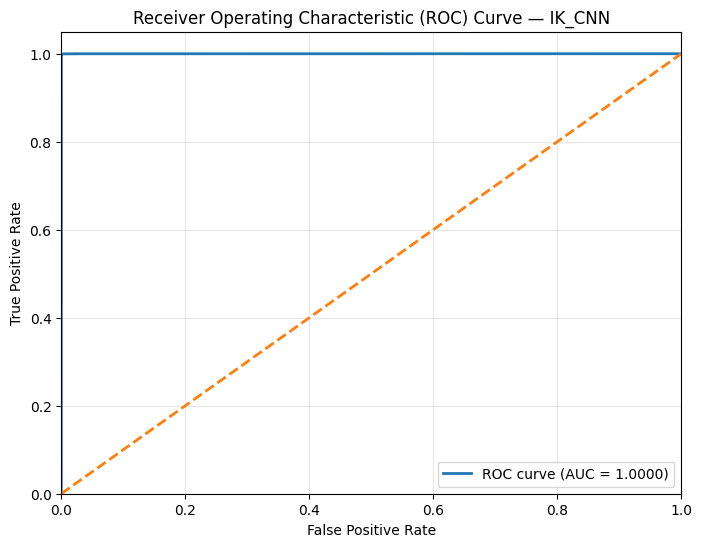

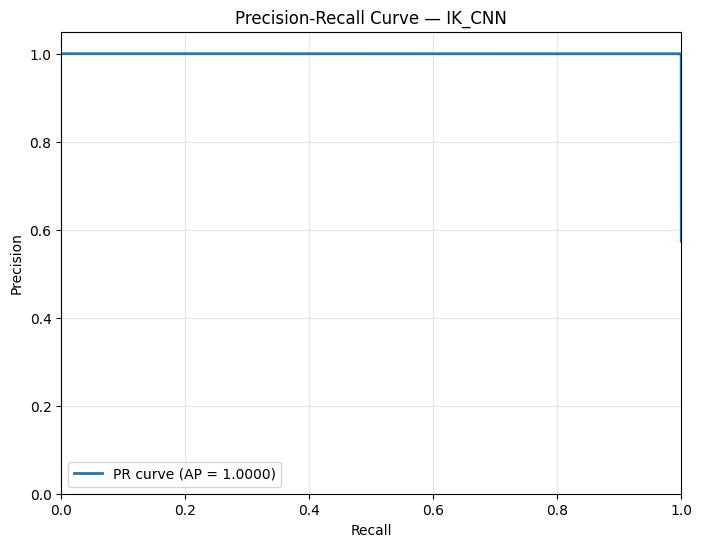

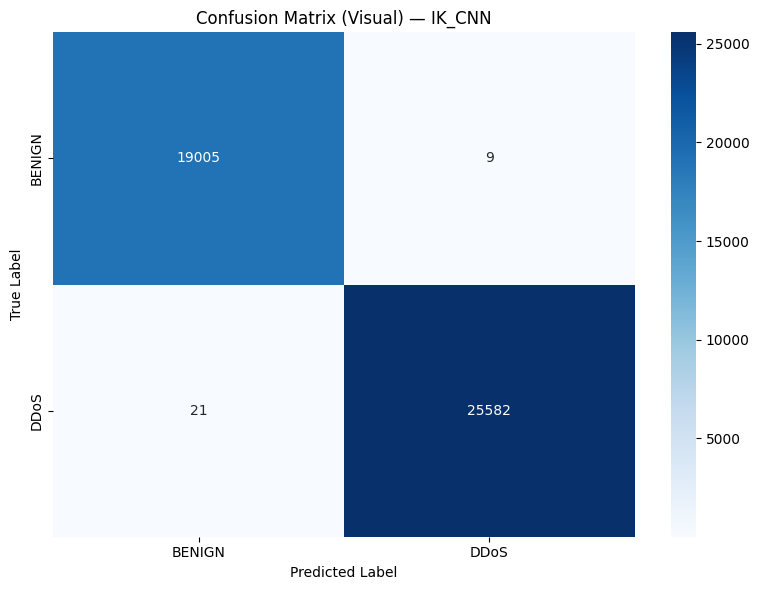

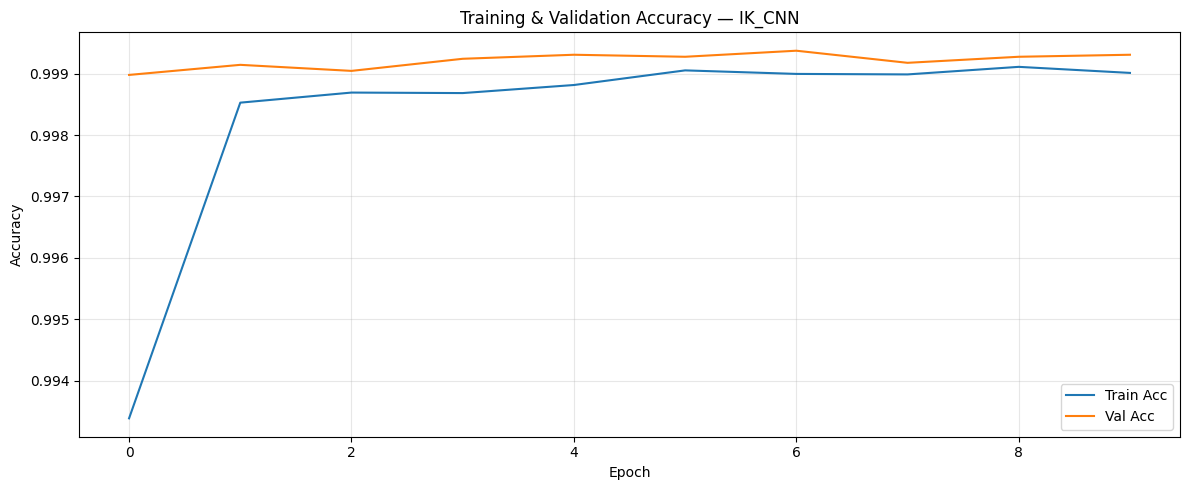

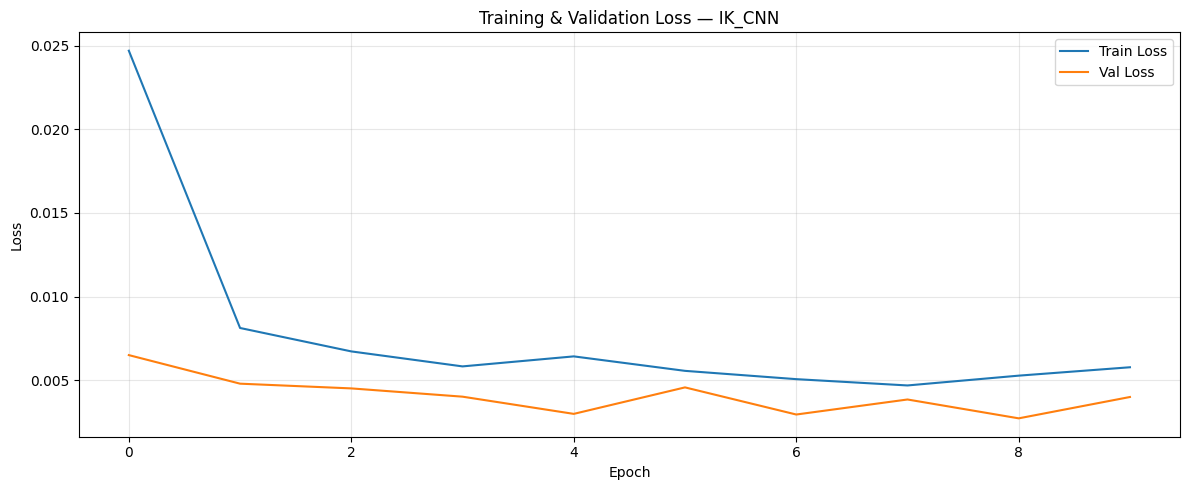

✅ Saved all figures to ./figs/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Pickle bundle saved to: /content/drive/MyDrive/IK_cnn_model.pkl


In [6]:
# ✅ STEP 2: Train CNN Classifier on Cleaned Dataset
# This step assumes the preprocessing from the 'cleaned_data_corrected' Canvas
# has already been executed and its outputs (X_train_scaled, y_train_balanced, X_test_scaled, y_test)
# are available in the environment.

# 🔹 Step 2.0: Imports & Reproducibility (IK_)
import os, random, joblib
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score,
    precision_score, recall_score, f1_score,
    roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
)
import matplotlib.pyplot as plt
import seaborn as sns

# Set a seed so results are repeatable
IK_SEED = 42
random.seed(IK_SEED)
np.random.seed(IK_SEED)
tf.random.set_seed(IK_SEED)

print("✅ Imports ready. Seed set:", IK_SEED)

# 🔹 Step 2.1: Verify if preprocessed data exists (IK_)
try:
    # These variables should be available after running the preprocessing steps (Step 1)
    X_train_scaled, y_train_balanced, X_test_scaled, y_test
except NameError:
    raise Exception("❌ Preprocessed data (X_train_scaled, y_train_balanced, X_test_scaled, y_test) not found. "
                    "Please ensure the 'cleaned_data_corrected' (Step 1) is executed first.")

# Convert y labels to integer (good safeguard)
IK_y_train_balanced = y_train_balanced.astype(int)
IK_y_test = y_test.astype(int)

# Convert DataFrames to NumPy arrays before reshaping
IK_X_train_scaled_np = X_train_scaled.to_numpy()
IK_X_test_scaled_np  = X_test_scaled.to_numpy()
print("✅ Verified. Train/Test shapes:", IK_X_train_scaled_np.shape, IK_X_test_scaled_np.shape)

# 🔹 Step 2.2: Reshape data for CNN (Conv1D expects 3D input: samples, timesteps(features), channels) (IK_)
# Here, each feature is treated as a timestep, and we have 1 channel.
IK_X_train_cnn = IK_X_train_scaled_np.reshape(IK_X_train_scaled_np.shape[0], IK_X_train_scaled_np.shape[1], 1)
IK_X_test_cnn  = IK_X_test_scaled_np.reshape(IK_X_test_scaled_np.shape[0],  IK_X_test_scaled_np.shape[1],  1)

print(f"\nReshaped X_train for CNN: {IK_X_train_cnn.shape}")
print(f"Reshaped X_test  for CNN: {IK_X_test_cnn.shape}")

# 🔹 Step 2.3: Build the CNN model (IK_)
IK_cnn_model = models.Sequential([
    # First Convolutional Block
    layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(IK_X_train_cnn.shape[1], 1)),
    layers.MaxPooling1D(pool_size=2),
    layers.Dropout(0.25),  # regularization

    # Second Convolutional Block
    layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Dropout(0.25),  # regularization

    # Flatten the output for the Dense layers
    layers.Flatten(),

    # Dense layers for classification
    layers.Dense(units=128, activation='relu'),
    layers.Dropout(0.5),   # regularization

    # Output layer for binary classification (DDoS or BENIGN)
    layers.Dense(units=1, activation='sigmoid')  # Sigmoid for binary classification
])

print("\nIK_CNN Model created.")

# 🔹 Step 2.4: Compile the CNN model (IK_)
IK_cnn_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',   # Appropriate for binary classification
    metrics=['accuracy']
)

print("\nCNN Model Summary:")
IK_cnn_model.summary()

# 🔹 Step 2.5: Train the CNN model (IK_)
# Tip: you can increase epochs; EarlyStopping can be added if you want (shown commented)
IK_callbacks = [
    # keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
]

print("\nTraining CNN model...")
IK_history = IK_cnn_model.fit(
    IK_X_train_cnn, IK_y_train_balanced,
    epochs=10,            # Number of training epochs (adjust as needed)
    batch_size=32,        # Number of samples per gradient update
    validation_split=0.2, # Use 20% of training data for validation
    callbacks=IK_callbacks,
    verbose=1             # Show training progress
)
print("✅ CNN model training complete.")

# 🔹 Step 2.6: Make predictions (IK_)
# Get probabilities, then convert to binary predictions (0 or 1)
IK_y_pred_proba = IK_cnn_model.predict(IK_X_test_cnn).ravel()     # shape (N,)
IK_threshold = 0.5                                                 # default decision threshold
IK_y_pred = (IK_y_pred_proba > IK_threshold).astype(int)

print("✅ Predictions completed. Example probs:", IK_y_pred_proba[:5])

# 🔹 Step 2.7: Evaluation (Written CM + Metrics) (IK_)
print("\n" + "=" * 60)
print("             CNN MODEL EVALUATION (IK_)             ")
print("=" * 60)

# Confusion Matrix (Written)
print("📊 Confusion Matrix (Written):")
IK_cm = confusion_matrix(IK_y_test, IK_y_pred)
print(IK_cm)

# Full metrics
print("\n📈 Classification Report:")
print(classification_report(IK_y_test, IK_y_pred, digits=4))

IK_accuracy  = accuracy_score(IK_y_test, IK_y_pred)
IK_precision = precision_score(IK_y_test, IK_y_pred, zero_division=0)
IK_recall    = recall_score(IK_y_test, IK_y_pred, zero_division=0)
IK_f1        = f1_score(IK_y_test, IK_y_pred, zero_division=0)

print(f"🎯 Accuracy: {IK_accuracy:.4f}")
print(f"🔸 Precision: {IK_precision:.4f}")
print(f"🔹 Recall: {IK_recall:.4f}")
print(f"🧮 F1-Score: {IK_f1:.4f}")
print("=" * 60 + "\n")

# 🔹 Step 2.8: Plot ROC Curve (IK_)
IK_fpr, IK_tpr, IK_thresholds = roc_curve(IK_y_test, IK_y_pred_proba)
IK_roc_auc = roc_auc_score(IK_y_test, IK_y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(IK_fpr, IK_tpr, lw=2, label=f'ROC curve (AUC = {IK_roc_auc:.4f})')
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve — IK_CNN')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

# 🔹 Step 2.9: Plot Precision-Recall Curve (IK_)
IK_precision_curve, IK_recall_curve, _ = precision_recall_curve(IK_y_test, IK_y_pred_proba)
IK_average_precision = average_precision_score(IK_y_test, IK_y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(IK_recall_curve, IK_precision_curve, lw=2, label=f'PR curve (AP = {IK_average_precision:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve — IK_CNN')
plt.legend(loc="lower left")
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.grid(True, alpha=0.3)
plt.show()

# 🔹 Step 2.10: Visual Confusion Matrix (IK_)
plt.figure(figsize=(8, 6))
sns.heatmap(IK_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['BENIGN', 'DDoS'], yticklabels=['BENIGN', 'DDoS'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Visual) — IK_CNN')
plt.tight_layout()
plt.show()

# 🔹 Step 2.11: Plot Training Curves (Accuracy & Loss) (IK_)
plt.figure(figsize=(12, 5))
plt.plot(IK_history.history['accuracy'], label='Train Acc')
plt.plot(IK_history.history['val_accuracy'], label='Val Acc')
plt.title('Training & Validation Accuracy — IK_CNN')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.legend(); plt.grid(True, alpha=0.3)
plt.tight_layout(); plt.show()

plt.figure(figsize=(12, 5))
plt.plot(IK_history.history['loss'], label='Train Loss')
plt.plot(IK_history.history['val_loss'], label='Val Loss')
plt.title('Training & Validation Loss — IK_CNN')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend(); plt.grid(True, alpha=0.3)
plt.tight_layout(); plt.show()

# 🔹 Step 2.12: Save Figures (PNG) for report (IK_)
os.makedirs("figs", exist_ok=True)

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(IK_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['BENIGN', 'DDoS'], yticklabels=['BENIGN', 'DDoS'])
plt.xlabel('Predicted Label'); plt.ylabel('True Label'); plt.title('Confusion Matrix (Visual) — IK_CNN')
plt.tight_layout(); plt.savefig("figs/IK_confusion_matrix.png", dpi=150); plt.close()

# ROC
plt.figure(figsize=(8, 6))
plt.plot(IK_fpr, IK_tpr, lw=2, label=f'ROC curve (AUC = {IK_roc_auc:.4f})')
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve — IK_CNN')
plt.legend(loc="lower right"); plt.grid(True, alpha=0.3)
plt.tight_layout(); plt.savefig("figs/IK_roc_curve.png", dpi=150); plt.close()

# PR
plt.figure(figsize=(8, 6))
plt.plot(IK_recall_curve, IK_precision_curve, lw=2, label=f'PR curve (AP = {IK_average_precision:.4f})')
plt.xlabel('Recall'); plt.ylabel('Precision')
plt.title('Precision-Recall Curve — IK_CNN')
plt.legend(loc="lower left"); plt.grid(True, alpha=0.3)
plt.tight_layout(); plt.savefig("figs/IK_pr_curve.png", dpi=150); plt.close()

# Training curves
plt.figure(figsize=(12, 5))
plt.plot(IK_history.history['accuracy'], label='Train Acc')
plt.plot(IK_history.history['val_accuracy'], label='Val Acc')
plt.title('Training & Validation Accuracy — IK_CNN')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.legend(); plt.grid(True, alpha=0.3)
plt.tight_layout(); plt.savefig("figs/IK_train_val_accuracy.png", dpi=150); plt.close()

plt.figure(figsize=(12, 5))
plt.plot(IK_history.history['loss'], label='Train Loss')
plt.plot(IK_history.history['val_loss'], label='Val Loss')
plt.title('Training & Validation Loss — IK_CNN')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend(); plt.grid(True, alpha=0.3)
plt.tight_layout(); plt.savefig("figs/IK_train_val_loss.png", dpi=150); plt.close()

print("✅ Saved all figures to ./figs/")

# 🔹 Step 2.13: Save the trained CNN model as a .pkl bundle (IK_)
# The bundle includes: model config (JSON), weights, input shape, threshold,
# labels, metrics (Acc/Prec/Rec/F1/ROC-AUC/AP), confusion matrix, curves, and figure paths.

IK_MODEL_PKL = "IK_cnn_model.pkl"
IK_feature_names = list(X_train_scaled.columns) if hasattr(X_train_scaled, "columns") else None

IK_bundle = {
    "model_type": "keras_cnn_1d",
    "model_json": IK_cnn_model.to_json(),          # allows reconstruction later
    "weights": IK_cnn_model.get_weights(),         # list of NumPy arrays (picklable)
    "input_shape": IK_X_train_cnn.shape[1:],       # (timesteps, channels)
    "threshold": float(IK_threshold),
    "labels": {0: "BENIGN", 1: "DDoS"},
    "feature_names": IK_feature_names,             # optional, for reference
    "metrics": {
        "accuracy": float(IK_accuracy),
        "precision": float(IK_precision),
        "recall": float(IK_recall),
        "f1": float(IK_f1),
        "roc_auc": float(IK_roc_auc),
        "average_precision": float(IK_average_precision),
        "confusion_matrix": IK_cm.tolist()
    },
    "roc_curve": {"fpr": IK_fpr.tolist(), "tpr": IK_tpr.tolist()},
    "pr_curve": {"precision": IK_precision_curve.tolist(), "recall": IK_recall_curve.tolist()},
    "history": {k: [float(x) for x in v] for k, v in IK_history.history.items()},
    "figures": {
        "confusion_matrix_png": "figs/IK_confusion_matrix.png",
        "roc_curve_png": "figs/IK_roc_curve.png",
        "pr_curve_png": "figs/IK_pr_curve.png",
        "train_val_accuracy_png": "figs/IK_train_val_accuracy.png",
        "train_val_loss_png": "figs/IK_train_val_loss.png",
    }
}

# Mount Google Drive (only needs to be run once per session)
from google.colab import drive
drive.mount('/content/drive')

# Save the model directly into Drive
IK_MODEL_PKL = "/content/drive/MyDrive/IK_cnn_model.pkl"
joblib.dump(IK_bundle, IK_MODEL_PKL)
print(f"✅ Pickle bundle saved to: {IK_MODEL_PKL}")

=================================================================================================================

ERIC TAN XIN ZHEN (ANN)

In [7]:
# This cell contains the code from ann.txt to define and train the ANN model.
# It uses the preprocessed data (X_train_scaled, y_train_balanced, X_test_scaled, y_test)
# that was generated by running the notebook from the GitHub URL.

# Code from ann.txt starts here:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd
import joblib
import os

# Define the ANN model
# The input dimension should match the number of features in your scaled training data (X_train_scaled)
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid') # Sigmoid for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy', # Binary crossentropy for binary classification
              metrics=['accuracy'])

# Train the model
# Use the scaled and balanced training data
history = model.fit(X_train_scaled, y_train_balanced, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test data
# Use the scaled test data
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\nTest Accuracy: {accuracy:.4f}") # Adjusted formatting to 4 decimal places

# Make predictions
y_pred_prob = model.predict(X_test_scaled).ravel()
y_pred = (y_pred_prob > 0.5).astype("int")

# Calculate and print individual metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print("\n--- Model Performance Summary ---")
print(f"🎯 Accuracy : {accuracy:.4f}")
print(f"🎯 Precision: {precision:.4f}")
print(f"🎯 Recall   : {recall:.4f}")
print(f"🎯 F1 Score : {f1:.4f}")
print(f"🎯 ROC AUC  : {roc_auc:.4f}")

# Display classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4)) # Adjusted formatting to 4 decimal places

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Create a DataFrame from the training history
history_df = pd.DataFrame(history.history)

# Add an epoch column for easier readability
history_df['epoch'] = history_df.index + 1

# Display the DataFrame
print("\nTraining History Table:")
display(history_df[['epoch', 'accuracy', 'val_accuracy', 'loss', 'val_loss']])


# === SAVE ANN TO A SINGLE .PKL (self-contained) ===
# If you used a scaler (e.g., StandardScaler/MinMaxScaler), keep the fitted object here.
# Example:
# from sklearn.preprocessing import StandardScaler
# scaler = fitted_scaler
# If you didn't use any scaler, set:
# scaler = None

# Try to recover real feature names (best), else fall back to generic names
try:
    # If you still have the original X_train dataframe (before scaling):
    feature_names = list(X_train.columns)  # BEST option
except:
    # If not available, try to sniff from X_train_scaled if it's a DataFrame
    feature_names = getattr(X_train_scaled, "columns", None)
    if feature_names is None:
        # last resort: create generic names by length
        feature_names = [f"f{i}" for i in range(X_train_scaled.shape[1])]

def save_ann_to_pkl(model, scaler, feature_names, pkl_path):
    """
    Saves a Keras ANN as a single .pkl:
    - model architecture (JSON)
    - model weights (numpy arrays)
    - optional sklearn scaler
    - feature names for alignment
    - compile info (lr/loss/metrics)
    """
    bundle = {
        "type": "ann_bundle_v1",
        "model_json": model.to_json(),
        "weights": model.get_weights(),   # numpy arrays (pickle‑safe)
        "scaler": scaler,                 # None or a fitted transformer
        "features": list(feature_names) if feature_names is not None else None,
        "compile": {"lr": 1e-3, "loss": "binary_crossentropy", "metrics": ["accuracy"]},
    }
    joblib.dump(bundle, pkl_path)
    print(f"✅ Saved ANN bundle to {pkl_path}")

# === Choose your save path (example: Google Drive in Colab) ===
pkl_path = "/content/drive/MyDrive/Eric_ann_ddos.pkl"
save_ann_to_pkl(model, scaler, feature_names, pkl_path)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
3803/3803 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9827 - loss: 0.0535 - val_accuracy: 0.9993 - val_loss: 0.0036
Epoch 2/10
3803/3803 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.9990 - loss: 0.0054 - val_accuracy: 0.9993 - val_loss: 0.0032
Epoch 3/10
3803/3803 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.9990 - loss: 0.0045 - val_accuracy: 0.9994 - val_loss: 0.0030
Epoch 4/10
3803/3803 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.9993 - loss: 0.0040 - val_accuracy: 0.9994 - val_loss: 0.0026
Epoch 5/10
3803/3803 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9992 - loss: 0.0044 - val_accuracy: 0.9994 - val_loss: 0.0036
Epoch 6/10
3803/3803 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9993 - loss: 0.0030 - val_accuracy: 0.9993 - val_loss: 0.0023
Epoch 7/10
3803/3803 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9992 - loss: 0.0031 - val_accuracy: 0.9993 - val_loss: 0.0026
Epoch 8/10
3803/3803 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9994 - loss: 0

,epoch,accuracy,val_accuracy,loss,val_loss
0,1,0.995373,0.999310,0.018370,0.003575
1,2,0.998948,0.999343,0.005339,0.003183
2,3,0.998989,0.999375,0.004371,0.002959
3,4,0.999211,0.999375,0.004098,0.002571
4,5,0.999228,0.999375,0.004031,0.003609
5,6,0.999236,0.999343,0.003205,0.002290
6,7,0.999277,0.999310,0.003027,0.002609
7,8,0.999351,0.999375,0.003356,0.002553
8,9,0.999375,0.999310,0.003416,0.003417
9,10,0.999375,0.999343,0.003143,0.002019


✅ Saved ANN bundle to /content/drive/MyDrive/Eric_ann_ddos.pkl


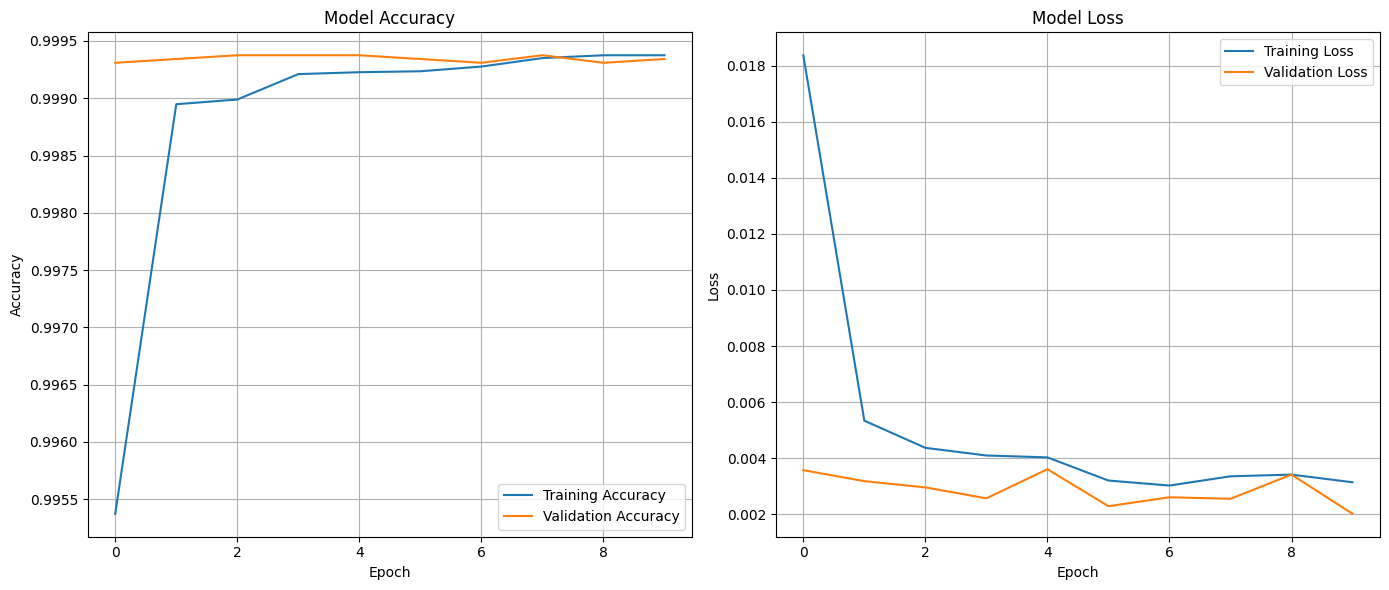

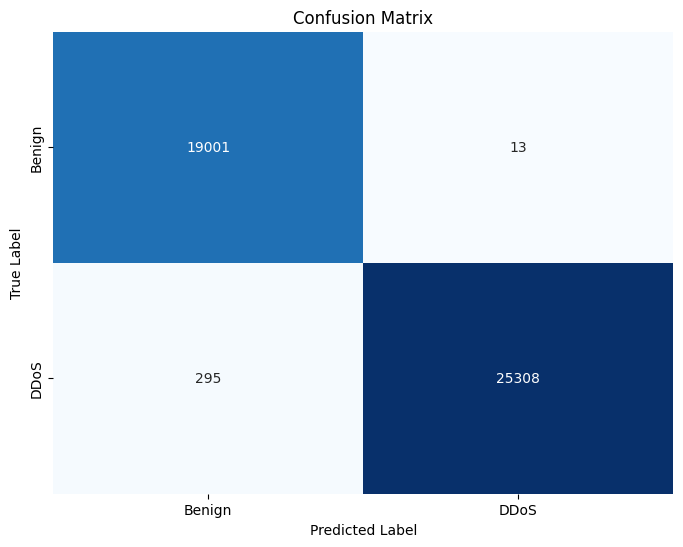

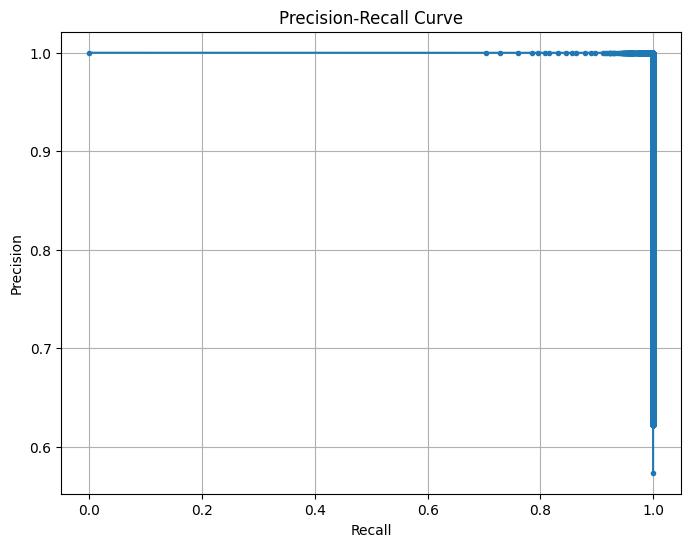

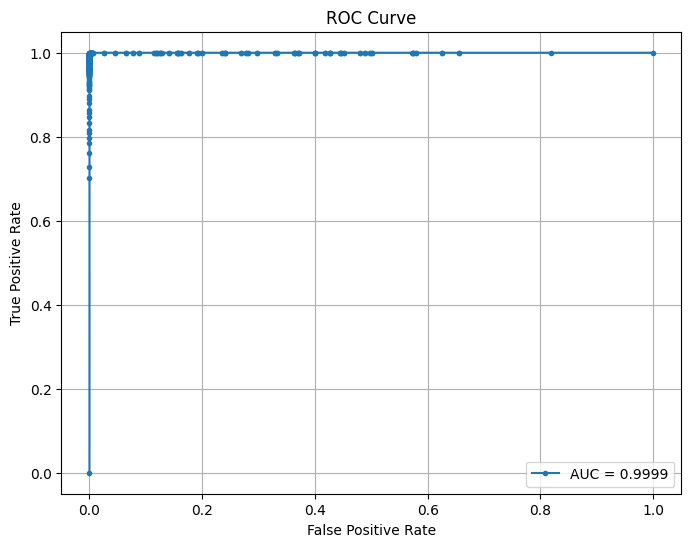

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, roc_curve, auc

# Create subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot training and validation accuracy
ax[0].plot(history.history['accuracy'], label='Training Accuracy')
ax[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend()
ax[0].grid(True)

# Plot training and validation loss
ax[1].plot(history.history['loss'], label='Training Loss')
ax[1].plot(history.history['val_loss'], label='Validation Loss')
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend()
ax[1].grid(True)

# Adjust spacing
plt.tight_layout()
plt.show()

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Benign', 'DDoS'], yticklabels=['Benign', 'DDoS'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# Calculate precision and recall for different thresholds
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', label=f'AUC = {roc_auc:.4f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


=================================================================================================================

AMOS WAI ZHAN (SGD)

Data ready for SGD Logistic:
  X_train: (152108, 73)  X_test: (44617, 73)
  y_train: (152108,)  (counts: [76054, 76054] )
  y_test : (44617,)  (counts: [19014, 25603] )
Epoch 01/10  train_acc: 0.9942  val_acc: 0.9940  train_loss: 0.0190  val_loss: 0.0206
Epoch 02/10  train_acc: 0.9983  val_acc: 0.9983  train_loss: 0.0174  val_loss: 0.0172
Epoch 03/10  train_acc: 0.9983  val_acc: 0.9983  train_loss: 0.0177  val_loss: 0.0179
Epoch 04/10  train_acc: 0.9983  val_acc: 0.9983  train_loss: 0.0168  val_loss: 0.0167
Epoch 05/10  train_acc: 0.9979  val_acc: 0.9976  train_loss: 0.0169  val_loss: 0.0171
Epoch 06/10  train_acc: 0.9981  val_acc: 0.9979  train_loss: 0.0165  val_loss: 0.0163
Epoch 07/10  train_acc: 0.9910  val_acc: 0.9913  train_loss: 0.0173  val_loss: 0.0166
Epoch 08/10  train_acc: 0.9970  val_acc: 0.9965  train_loss: 0.0170  val_loss: 0.0172
Epoch 09/10  train_acc: 0.9969  val_acc: 0.9964  train_loss: 0.0169  val_loss: 0.0170
Epoch 10/10  train_acc: 0.9932  val_acc: 0.9934  train_lo

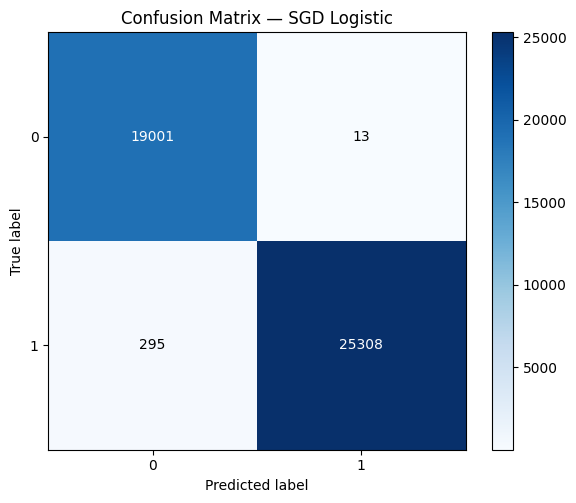

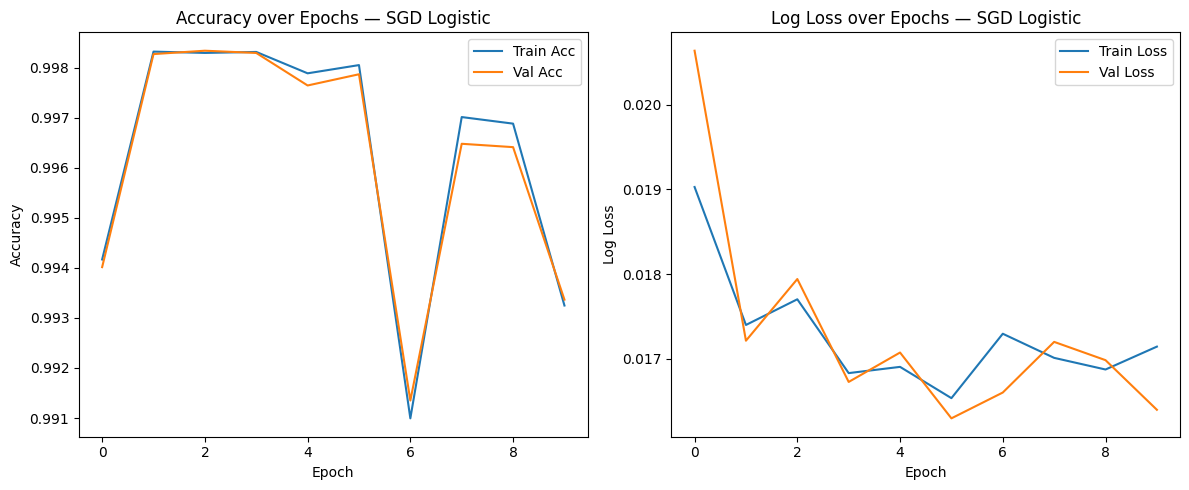

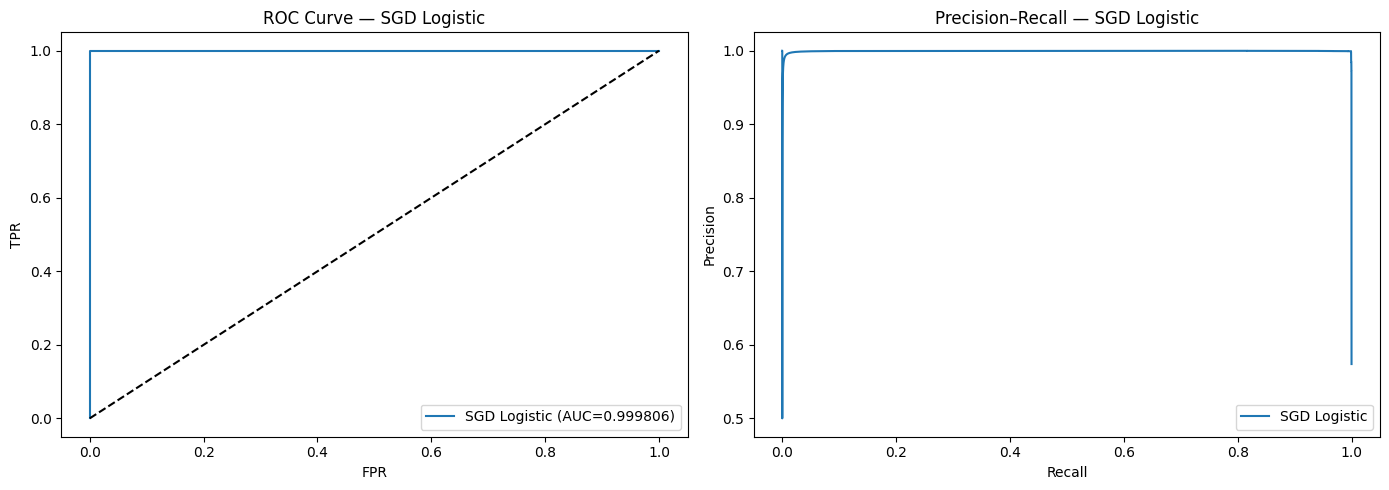

Saved model bundle to: /content/drive/MyDrive/Amos_sgd_logistic_bundle.pkl
🔎 Bundle keys: ['type', 'model', 'scaler', 'feature_names', 'classes', 'threshold', 'metrics', 'history']
🔎 Feature count: 73
🔎 Metrics snapshot: {'accuracy': 0.9930968016675258, 'precision': 0.9994865921567079, 'recall': 0.9884779127446003, 'f1': 0.9939517712669861, 'roc_auc': 0.9998061565187571}


In [10]:
# Single Algorithm WITH Epochs
# Algorithm: Logistic Regression via SGD (epochs with partial_fit)
# Step 1 created: X_train_scaled, X_test_scaled, y_train_bal (or y_train_balanced), y_test
import numpy as np, matplotlib.pyplot as plt, random
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, confusion_matrix, roc_curve, precision_recall_curve,
                             classification_report, log_loss)
from scipy.special import expit

np.random.seed(42); random.seed(42)

# Verify/alias preprocessed arrays from CleanedData.ipynb
needed = ["X_train_scaled", "X_test_scaled", "y_test"]
missing = [n for n in needed if n not in globals()]
if "y_train_bal" not in globals() and "y_train_balanced" in globals():
    y_train_bal = globals()["y_train_balanced"]
if "y_train_bal" not in globals():
    missing.append("y_train_bal (or y_train_balanced)")
if missing:
    raise NameError(f"❌ Preprocessed arrays not found: {missing}. Run CleanedData.ipynb first.")

# Ensure numpy arrays & int labels
def to_np(a):
    try:
        return a.values if hasattr(a, "values") else np.asarray(a)
    except Exception:
        return np.asarray(a)

X_tr = to_np(X_train_scaled)
X_te = to_np(X_test_scaled)
y_tr = to_np(y_train_bal).astype(int)
y_te = to_np(y_test).astype(int)

print("Data ready for SGD Logistic:")
print("  X_train:", X_tr.shape, " X_test:", X_te.shape)
print("  y_train:", y_tr.shape, " (counts:", np.bincount(y_tr).tolist(), ")")
print("  y_test :", y_te.shape,  " (counts:", np.bincount(y_te).tolist(), ")")


# Train Logistic Regression (SGD) with EPOCHS
EPOCHS     = 10        # adjust as needed
BATCH_SIZE = 2048      # mini-batch size
CLASSES    = np.array([0, 1])

sgd = SGDClassifier(
    loss="log_loss",     # Logistic regression with probabilities
    penalty="l2",
    alpha=1e-4,
    learning_rate="optimal",
    random_state=42
)

n = X_tr.shape[0]
idx = np.arange(n)
train_acc_hist, val_acc_hist = [], []
train_loss_hist, val_loss_hist = [], []

best_val_loss = np.inf
patience = 5          # Simple early stopping
wait = 0

for epoch in range(1, EPOCHS + 1):
    np.random.shuffle(idx)
    first = True
    for start in range(0, n, BATCH_SIZE):
        end = min(start + BATCH_SIZE, n)
        b = idx[start:end]
        Xb, yb = X_tr[b], y_tr[b]
        if first:
            sgd.partial_fit(Xb, yb, classes=CLASSES)
            first = False
        else:
            sgd.partial_fit(Xb, yb)

    # End-of-epoch metrics
    if hasattr(sgd, "predict_proba"):
        tr_prob = sgd.predict_proba(X_tr)[:,1]
        va_prob = sgd.predict_proba(X_te)[:,1]
    else:
        tr_prob = expit(sgd.decision_function(X_tr))
        va_prob = expit(sgd.decision_function(X_te))

    tr_pred = (tr_prob >= 0.5).astype(int)
    va_pred = (va_prob >= 0.5).astype(int)
    tr_acc = accuracy_score(y_tr, tr_pred)
    va_acc = accuracy_score(y_te, va_pred)
    tr_loss = log_loss(y_tr, tr_prob, labels=[0,1])
    va_loss = log_loss(y_te, va_prob, labels=[0,1])

    train_acc_hist.append(tr_acc); val_acc_hist.append(va_acc)
    train_loss_hist.append(tr_loss); val_loss_hist.append(va_loss)
    print(f"Epoch {epoch:02d}/{EPOCHS}  "
          f"train_acc: {tr_acc:.4f}  val_acc: {va_acc:.4f}  "
          f"train_loss: {tr_loss:.4f}  val_loss: {va_loss:.4f}")

    # Simple early stopping on val_loss
    if va_loss < best_val_loss - 1e-6:
        best_val_loss = va_loss
        wait = 0
        best_state = sgd.__dict__.copy()  # Lightweight snapshot of coef_, intercept_
    else:
        wait += 1
        if wait >= patience:
            print(f"Early stopping at epoch {epoch} (no val_loss improvement for {patience} epochs).")
            break

# Restore best weights if early stopped
if 'best_state' in locals():
    for k, v in best_state.items():
        try:
            setattr(sgd, k, v)
        except Exception:
            pass

# Final Evaluation
if hasattr(sgd, "predict_proba"):
    y_prob = sgd.predict_proba(X_te)[:,1]
else:
    y_prob = expit(sgd.decision_function(X_te))
y_pred = (y_prob >= 0.5).astype(int)

print("\n" + "="*60)
print("     SGD Logistic Regression — FINAL EVALUATION      ")
print("="*60)
print("Confusion Matrix:")
print(confusion_matrix(y_te, y_pred))
print("\nClassification Report:")
print(classification_report(y_te, y_pred, digits=6))
print(f"Accuracy : {accuracy_score(y_te, y_pred):.6f}")
print(f"Precision: {precision_score(y_te, y_pred):.6f}")
print(f"Recall   : {recall_score(y_te, y_pred):.6f}")
print(f"F1 Score : {f1_score(y_te, y_pred):.6f}")
print(f"ROC AUC  : {roc_auc_score(y_te, y_prob):.6f}")
print("="*60 + "\n")

# Visualize Confusion Matrix
plt.figure(figsize=(6,5))
cm = confusion_matrix(y_te, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix — SGD Logistic")
plt.colorbar()
tick_marks = np.arange(len(CLASSES))
plt.xticks(tick_marks, CLASSES)
plt.yticks(tick_marks, CLASSES)

# Label axes
plt.xlabel("Predicted label")
plt.ylabel("True label")

# Annotate cells
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

# Learning Curves + ROC/PR
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(train_acc_hist, label="Train Acc")
plt.plot(val_acc_hist,   label="Val Acc")
plt.title("Accuracy over Epochs — SGD Logistic")
plt.xlabel("Epoch"); plt.ylabel("Accuracy"); plt.legend()

plt.subplot(1,2,2)
plt.plot(train_loss_hist, label="Train Loss")
plt.plot(val_loss_hist,   label="Val Loss")
plt.title("Log Loss over Epochs — SGD Logistic")
plt.xlabel("Epoch"); plt.ylabel("Log Loss"); plt.legend()
plt.tight_layout(); plt.show()

plt.figure(figsize=(14,5))
# ROC
plt.subplot(1,2,1)
fpr, tpr, _ = roc_curve(y_te, y_prob)
plt.plot(fpr, tpr, label=f"SGD Logistic (AUC={roc_auc_score(y_te, y_prob):.6f})")
plt.plot([0,1],[0,1],'k--')
plt.title("ROC Curve — SGD Logistic")
plt.xlabel("FPR"); plt.ylabel("TPR"); plt.legend()
# PR
plt.subplot(1,2,2)
prec, rec, _ = precision_recall_curve(y_te, y_prob)
plt.plot(rec, prec, label="SGD Logistic")
plt.title("Precision–Recall — SGD Logistic")
plt.xlabel("Recall"); plt.ylabel("Precision"); plt.legend()
plt.tight_layout(); plt.show()

# Save Trained SGD Logistic Model as a single pkl bundle
fitted_scaler = globals().get("scaler", None)
try:
    feature_names = list(X_train_scaled.columns)
except Exception:
    feature_names = [f"f{i}" for i in range(X_train_scaled.shape[1])]
# Collect final metrics (recompute to be safe)
final_metrics = {
    "accuracy":  float(accuracy_score(y_te, y_pred)),
    "precision": float(precision_score(y_te, y_pred)),
    "recall":    float(recall_score(y_te, y_pred)),
    "f1":        float(f1_score(y_te, y_pred)),
    "roc_auc":   float(roc_auc_score(y_te, y_prob))
}

# Training history (from the epoch loop above)
history_dict = {
    "train_acc":  [float(x) for x in train_acc_hist],
    "val_acc":    [float(x) for x in val_acc_hist],
    "train_loss": [float(x) for x in train_loss_hist],
    "val_loss":   [float(x) for x in val_loss_hist],
    "epochs_run": len(train_acc_hist)
}

# Build the bundle
bundle = {
    "type": "ddos_sgd_logistic_v1",
    "model": sgd,                        # sklearn estimator (picklable)
    "scaler": fitted_scaler,             # may be None if not available
    "feature_names": feature_names,
    "classes": [0, 1],
    "threshold": 0.5,                    # decision threshold used for y_pred
    "metrics": final_metrics,
    "history": history_dict,
}

# Save to Google Drive (adjust the folder if you like)
save_path = "/content/drive/MyDrive/Amos_sgd_logistic_bundle.pkl"

os.makedirs(os.path.dirname(save_path), exist_ok=True)
joblib.dump(bundle, save_path)

print("Saved model bundle to:", save_path)

# Quick load test to verify the file
_loaded = joblib.load(save_path)
print("🔎 Bundle keys:", list(_loaded.keys()))
print("🔎 Feature count:", len(_loaded['feature_names']))
print("🔎 Metrics snapshot:", _loaded['metrics'])

Table Comparison

In [12]:
import pandas as pd
import numpy as np
import os

# --- Safety helpers to coerce any missing values to float NaN cleanly ---
def _safe_float(x):
    try:
        return float(x)
    except Exception:
        return np.nan

# --- Rows for each member/model ---
rows = [
    {
        "Member": "Isaac",
        "Model": "CNN",
        "Accuracy": _safe_float(IK_accuracy),
        "F1": _safe_float(IK_f1),
        "Precision": _safe_float(IK_precision),
        "ROC_AUC": _safe_float(IK_roc_auc),
        "Recall": _safe_float(IK_recall),
        "Run Time (s)": _safe_float(globals().get("IK_cnn_seconds", np.nan)),
        "Epochs Run": len(IK_history.history.get("loss", [])) if "IK_history" in globals() else np.nan,
    },
    {
        "Member": "Eric",
        "Model": "ANN",
        "Accuracy": _safe_float(accuracy),
        "F1": _safe_float(f1),
        "Precision": _safe_float(precision),
        "ROC_AUC": _safe_float(roc_auc),
        "Recall": _safe_float(recall),
        "Run Time (s)": _safe_float(globals().get("ann_seconds", np.nan)),
        "Epochs Run": len(history.history.get("loss", [])) if "history" in globals() else np.nan,
    },
    {
        "Member": "Amos",
        "Model": "SGD (Logistic)",
        "Accuracy": _safe_float(final_metrics.get("accuracy", np.nan)) if "final_metrics" in globals() else np.nan,
        "F1": _safe_float(final_metrics.get("f1", np.nan)) if "final_metrics" in globals() else np.nan,
        "Precision": _safe_float(final_metrics.get("precision", np.nan)) if "final_metrics" in globals() else np.nan,
        "ROC_AUC": _safe_float(final_metrics.get("roc_auc", np.nan)) if "final_metrics" in globals() else np.nan,
        "Recall": _safe_float(final_metrics.get("recall", np.nan)) if "final_metrics" in globals() else np.nan,
        "Run Time (s)": _safe_float(globals().get("sgd_seconds", np.nan)),
        "Epochs Run": history_dict.get("epochs_run", np.nan) if "history_dict" in globals() else np.nan,
    },
]

# Desired column order (matching your request)
cols = ["Member", "Model", "Accuracy", "F1", "Precision", "ROC_AUC", "Recall", "Run Time (s)", "Epochs Run"]
df = pd.DataFrame(rows)[cols]

# Sort by Accuracy (desc) just for convenience — optional
df_sorted = df.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

print("\n=== Team Model Comparison ===")
display(df_sorted.style.format({
    "Accuracy": "{:.4f}",
    "F1": "{:.4f}",
    "Precision": "{:.4f}",
    "ROC_AUC": "{:.4f}",
    "Recall": "{:.4f}",
    "Run Time (s)": "{:.2f}",
    "Epochs Run": "{:d}"
}, na_rep="N/A"))

# Save to Drive as CSV (adjust path if desired)
save_csv = "/content/drive/MyDrive/team_model_comparison.csv"
os.makedirs(os.path.dirname(save_csv), exist_ok=True)
df_sorted.to_csv(save_csv, index=False)
print(f"\n📁 Saved comparison table to: {save_csv}")



=== Team Model Comparison ===


,Member,Model,Accuracy,F1,Precision,ROC_AUC,Recall,Run Time (s),Epochs Run
0,Eric,ANN,0.9995,0.9996,0.9999,0.9999,0.9992,N/A,10
1,Isaac,CNN,0.9993,0.9994,0.9996,1.0000,0.9992,N/A,10
2,Amos,SGD (Logistic),0.9931,0.9940,0.9995,0.9998,0.9885,N/A,10



📁 Saved comparison table to: /content/drive/MyDrive/team_model_comparison.csv


=================================================================================================================

GUI

In [15]:
!pip install -q gradio tensorflow joblib pandas numpy scikit-learn

import gradio as gr
import pandas as pd
import numpy as np
import joblib, traceback, io, os
import matplotlib.pyplot as plt

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, roc_auc_score, classification_report
)

import tensorflow as tf
from tensorflow.keras.models import model_from_json
from tensorflow.keras.optimizers import Adam


# =========================
# 1) Load ANN from .pkl
# =========================
PKL_PATH = "/content/drive/MyDrive/Eric_ann_ddos.pkl"  # <-- change if needed

def load_ann_from_pkl(pkl_path):
    bundle = joblib.load(pkl_path)
    if not (isinstance(bundle, dict) and bundle.get("type") == "ann_bundle_v1"):
        raise ValueError("Not an ANN bundle (.pkl with type='ann_bundle_v1').")

    model = model_from_json(bundle["model_json"])
    lr = bundle.get("compile", {}).get("lr", 1e-3)
    loss = bundle.get("compile", {}).get("loss", "binary_crossentropy")
    metrics = bundle.get("compile", {}).get("metrics", ["accuracy"])
    model.compile(optimizer=Adam(learning_rate=lr), loss=loss, metrics=metrics)
    model.set_weights(bundle["weights"])

    scaler = bundle.get("scaler", None)
    features = bundle.get("features", None)
    return model, scaler, features

model, scaler, feats = load_ann_from_pkl(PKL_PATH)


# =========================
# 2) Helpers
# =========================
def _read_csv_flex(file_obj_or_path):
    """Accepts Gradio file object or string path; tries tolerant read."""
    if hasattr(file_obj_or_path, "name"):
        path = file_obj_or_path.name
    elif isinstance(file_obj_or_path, str):
        path = file_obj_or_path
    else:
        raise ValueError("Unsupported CSV input.")

    try:
        return pd.read_csv(path, low_memory=False, on_bad_lines="skip", encoding_errors="replace")
    except Exception:
        return pd.read_csv(path, engine="python", on_bad_lines="skip", encoding_errors="replace")

def _prepare_numeric_matrix(df: pd.DataFrame, features, scaler):
    """
    Build exactly the feature matrix the scaler/model expect:
      - Prefer scaler.feature_names_in_ for canonical order
      - else use 'features' stored in .pkl
      - else use numeric columns present
      - add any missing columns as 0.0
      - strict column order
      - fill NaNs with 0.0
      - transform with scaler if provided
    Returns: (X_ndarray, X_used_df, missing_feature_list)
    """
    X = df.select_dtypes(include=[np.number]).copy()
    scaler_feats = list(getattr(scaler, "feature_names_in_", [])) if scaler is not None else []
    if len(scaler_feats) > 0:
        required = scaler_feats
    elif features is not None:
        required = list(features)
    else:
        required = list(X.columns)

    missing = [f for f in required if f not in X.columns]
    for m in missing:
        X[m] = 0.0

    X = X[required].fillna(0.0)
    X_nd = scaler.transform(X.values) if scaler is not None else X.values
    return X_nd, X, missing

def _predict_proba(model: tf.keras.Model, X_nd):
    return model.predict(X_nd, verbose=0).ravel()


# =========================
# 3) Core: predict + visualize
# =========================
def predict_and_visualize(csv_file, threshold):
    try:
        df = _read_csv_flex(csv_file)
        if df.empty:
            return ("CSV is empty.", None, None, None, None, None)

        # Find optional label column
        cand = [c for c in df.columns if c.lower() in ("label", "target", "class", "attack", "category")]
        label_col = cand[0] if cand else None

        if label_col:
            mapping = {"BENIGN":0,"Benign":0,"benign":0,"DDoS":1,"DDOS":1,"ddos":1}
            try:
                y_true = df[label_col].map(mapping).fillna(df[label_col]).astype(int).values
            except Exception:
                y_true = None
            X_df = df.drop(columns=[label_col])
        else:
            y_true = None
            X_df = df

        # Prepare features
        X_nd, X_used, missing = _prepare_numeric_matrix(X_df, feats, scaler)

        # Predict
        probs = _predict_proba(model, X_nd)
        preds = (probs >= float(threshold)).astype(int)

        # Compose summary text
        lines = []
        lines.append(f"Rows: {len(df)}  |  Numeric features used: {X_used.shape[1]}")
        lines.append(f"Threshold: {threshold:.2f}")
        if missing:
            lines.append(f"Filled {len(missing)} missing feature(s) with 0.0: {', '.join(missing[:10])}{' ...' if len(missing)>10 else ''}")

        # Build preview table
        preview = df.copy()
        preview["prob_ddos"] = probs
        preview["pred_label"] = preds
        preview_show = preview.head(30)

        # Save full results
        out_path = "/content/ann_ddos_predictions.csv"
        preview.to_csv(out_path, index=False)

        # Figures
        cm_fig = None
        roc_fig = None

        # If labels provided, compute metrics + plots
        if y_true is not None and len(y_true) == len(preds):
            acc = accuracy_score(y_true, preds)
            prec = precision_score(y_true, preds, zero_division=0)
            rec = recall_score(y_true, preds, zero_division=0)
            f1 = f1_score(y_true, preds, zero_division=0)
            lines.append(f"Accuracy: {acc:.3f} | Precision(DDoS): {prec:.3f} | Recall(DDoS): {rec:.3f} | F1: {f1:.3f}")

            # Confusion Matrix
            cm = confusion_matrix(y_true, preds, labels=[0,1])
            cm_fig, ax = plt.subplots()
            im = ax.imshow(cm, interpolation="nearest")
            ax.set_title("Confusion Matrix")
            ax.set_xticks([0,1]); ax.set_yticks([0,1])
            ax.set_xticklabels(["BENIGN","DDoS"]); ax.set_yticklabels(["BENIGN","DDoS"])
            for i in range(cm.shape[0]):
                for j in range(cm.shape[1]):
                    ax.text(j, i, cm[i,j], ha="center", va="center")
            ax.set_xlabel("Predicted"); ax.set_ylabel("True")
            plt.tight_layout()

            # ROC
            try:
                fpr, tpr, _ = roc_curve(y_true, probs)
                auc = roc_auc_score(y_true, probs)
                roc_fig, ax2 = plt.subplots()
                ax2.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
                ax2.plot([0,1], [0,1], linestyle="--")
                ax2.set_xlabel("False Positive Rate")
                ax2.set_ylabel("True Positive Rate")
                ax2.set_title("ROC Curve")
                ax2.legend()
                plt.tight_layout()
            except Exception:
                pass
        else:
            lines.append("No labels found — showing predictions only (no CM/ROC).")

        # Probability per-row plot
        prob_fig, pax = plt.subplots()
        pax.plot(probs, label="P(DDoS)")
        pax.axhline(float(threshold), linestyle="--", label=f"Threshold={threshold:.2f}")
        pax.set_xlabel("Row index")
        pax.set_ylabel("Predicted Probability of DDoS")
        pax.set_title("Prediction Confidence per Sample")
        pax.legend()
        plt.tight_layout()

        summary = "\n".join(lines)
        return summary, preview_show, cm_fig, roc_fig, prob_fig, out_path

    except Exception as e:
        tb = traceback.format_exc()
        err = f"Error:\n{e}\n\nTraceback:\n{tb}"
        return (err, None, None, None, None, None)


# =========================
# 4) Gradio UI
# =========================
with gr.Blocks(title="ANN DDoS Detector") as demo:
    gr.Markdown("## 🛡️ ANN DDoS Detector — Predict & Visualize")
    with gr.Row():
        csv_in = gr.File(label="Upload CSV")
    with gr.Row():
        thr = gr.Slider(0.05, 0.95, value=0.50, step=0.01,
                        label="Decision threshold (DDoS if prob ≥ threshold)")
        run_btn = gr.Button("Run Prediction & Visualization", variant="primary")

    summary = gr.Textbox(label="Summary / Logs", lines=8)
    preview = gr.Dataframe(label="Preview (first 30 rows)", wrap=True)

    with gr.Row():
        cm_plot = gr.Plot(label="Confusion Matrix (requires labels)")
        roc_plot = gr.Plot(label="ROC Curve (requires labels)")

    prob_plot = gr.Plot(label="Probability per Row")
    dl = gr.File(label="Download full predictions (CSV)")

    run_btn.click(
        fn=predict_and_visualize,
        inputs=[csv_in, thr],
        outputs=[summary, preview, cm_plot, roc_plot, prob_plot, dl]
    )

demo.launch(share=True, debug=True)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://aab57868c6e65ef981.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://aab57868c6e65ef981.gradio.live
